In [115]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipywidgets import IntSlider, interactive
from scipy.stats import lognorm, norm

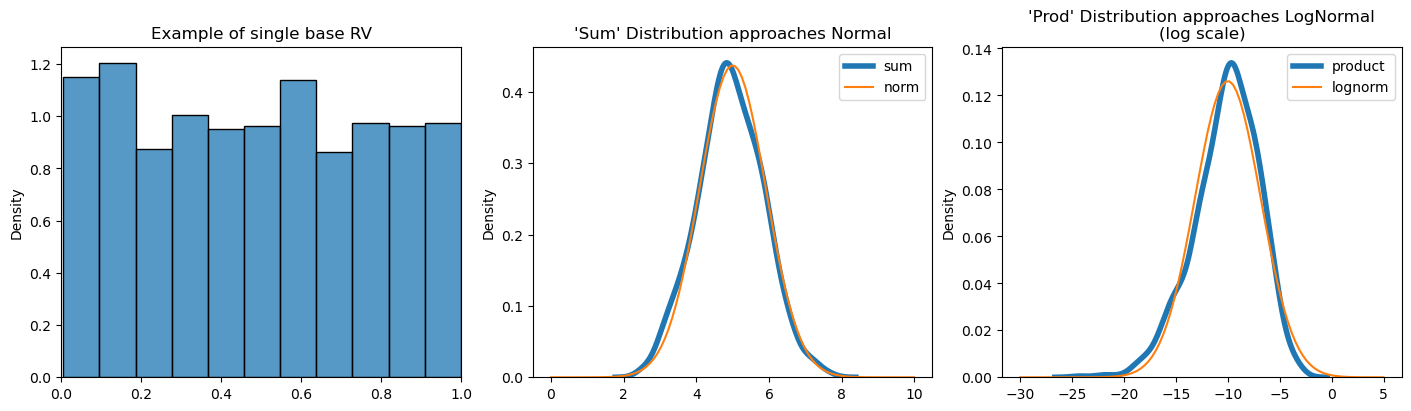

In [ ]:
def simulate(n: int, s: int) -> None:
    np.random.seed(42)

    # n = 1000  # number of samples in each RV, needed for plotting
    # s = 10  # number of RVs

    # Generate n random uniform distributions of s elements each
    a, b = 0, 1
    samples = np.random.uniform(a, b, size=(s, n))
    mu = (a + b) / 2
    sigma = np.sqrt((b - a) ** 2 / 12 / s)  # /s for mean, rather than sum

    fig, axes = plt.subplots(
        nrows=1,
        ncols=3,
        figsize=(14, 4),
        constrained_layout=True,
    )

    sns.histplot(samples[0, :], stat="density", ax=axes[0])
    axes[0].set(
        title="Example of single base RV",
        xlim=(0, 1),
    )

    # Aggregate the n uniform distributions into a single 'sum' distribution
    added = samples.sum(axis=0)
    assert added.shape[0] == n
    sns.kdeplot(added, lw=4, label="sum", ax=axes[1])

    # Generate 'reference' distribution
    _range = axes[1].get_xticks()
    xs = np.linspace(_range[0], _range[-1], 100)
    ys = norm.pdf(
        xs,
        loc=s * mu,
        scale=np.sqrt(s) * sigma,
    )
    axes[1].plot(xs, ys, label="norm")

    axes[1].legend()
    axes[1].set(
        title="'Sum' Distribution approaches Normal",
    )

    # Aggregate the n uniform distributions into a single 'prod' distribution
    prodded = samples.prod(axis=0)
    assert prodded.shape[0] == n
    sns.kdeplot(np.log(prodded), lw=4, label="product", ax=axes[2])

    # Generate 'reference' distribution
    _range = axes[2].get_xticks()
    xs = np.linspace(_range[0], _range[-1], 100)
    log_mu = -1  # For U(0, 1)
    log_std = 1  # For U(0, 1)
    # ys = lognorm.pdf(
    #     xs,
    #     s=np.sqrt(s) * log_std,
    #     scale=np.exp(s * log_mu),
    # )
    ys = norm.pdf(
        xs,
        loc=s * log_mu,
        scale=np.sqrt(s) * log_std,
    )
    axes[2].plot(xs, ys, label="lognorm")

    axes[2].legend()
    # axes[2].set_xscale("log")
    axes[2].set(
        title="'Prod' Distribution approaches LogNormal\n(log scale)",
    )


simulate(1000, 10)

In [142]:
interactive(
    simulate,
    n=IntSlider(value=1000, min=100, max=1000, step=100),
    s=IntSlider(value=1, min=1, max=20, step=1),
)

interactive(children=(IntSlider(value=1000, description='n', max=1000, min=100, step=100), IntSlider(value=1, …